<a href="https://colab.research.google.com/github/Alhano1f/Unraveling-the-Complexities-of-COVID-19-Resurgence-A-Global-Analysis/blob/main/Unraveling_the_Complexities_of_COVID_19_Resurgence_A_Global_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unraveling the Complexities of COVID-19 Resurgence: A Global Analysis**

#### **Introduction:**

The resurgence of COVID-19 in recent times has become a multifaceted challenge, shaped by a myriad of factors such as the emergence of highly transmissible Omicron subvariants, waning immunity from prior infections and vaccinations, and the gradual relaxation of pandemic-related restrictions. This resurgence has not only impacted individual countries but has reverberated across the global landscape, influencing trends in cases, deaths, and public health responses.

In this global context, the amalgamation of data and analysis serves as a clarion call to understand the intricate interplay of factors steering COVID-19 trends worldwide. From variant dynamics to immunity complexities and societal responses, a comprehensive comprehension of these driving forces is pivotal in crafting effective strategies and responses to mitigate the enduring impact of the pandemic.



---




#### The dataset: Daily COVID-19 cases & deaths

updated weekly. Users should note that, in addition to capturing new cases and deaths reported on any given day, updates are made retrospectively to correct counts on previous days as needed based on subsequent information received.

The Dataset, WHO COVID-19 global data: https://data.who.int/dashboards/covid19/data?n=c

under the title Statistical release,
Daily COVID-19 cases and deaths by date reported to WHO



---



### Connect with me on [LinkedIn](https://www.linkedin.com/in/alhanoufaldossary/). 🦾



---



#### *The libraries:*

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px



---



**1.Load the dataset into a pandas DataFrame.**

In [55]:
data = pd.read_csv("/content/WHO-COVID-19-global-data.csv")


**2.Display basic information about the dataset**


In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB
None


* Some columns have missing values (non-null count is less than the total entries).

In [57]:
print(data.head())

  Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-05           AF  Afghanistan       EMRO        NaN   
1    2020-01-12           AF  Afghanistan       EMRO        NaN   
2    2020-01-19           AF  Afghanistan       EMRO        NaN   
3    2020-01-26           AF  Afghanistan       EMRO        NaN   
4    2020-02-02           AF  Afghanistan       EMRO        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  


In [58]:
print(data.describe())

          New_cases  Cumulative_cases    New_deaths  Cumulative_deaths
count  3.902800e+04      5.784000e+04  25001.000000       5.784000e+04
mean   1.988104e+04      1.792594e+06    282.323947       2.001023e+04
std    2.707823e+05      7.797691e+06   1214.392195       8.186440e+04
min   -6.507900e+04      0.000000e+00  -3432.000000       0.000000e+00
25%    4.300000e+01      4.162750e+03      4.000000       2.800000e+01
50%    3.930000e+02      4.588300e+04     20.000000       5.650000e+02
75%    3.968000e+03      5.220872e+05    105.000000       6.974500e+03
max    4.047548e+07      1.034368e+08  47687.000000       1.194158e+06


* New_cases:
 * On average, about 19,881 new cases are reported.
 * The numbers vary widely, from -65,079 to 40.5 million.
 * Most days see relatively low new case numbers, with a few exceptional high days.

* Cumulative_cases:
  * The total cumulative cases average around 1.79 million.
  * The data spread is quite large, ranging from 0 to 103.4 million.

* New_deaths and Cumulative_deaths:
  * The average number of new deaths is about 282, with a maximum of 47,687.
  * Cumulative deaths range from 0 to 1.19 million, with an average of about 20,010.



---



**3.visualizations**

In [59]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

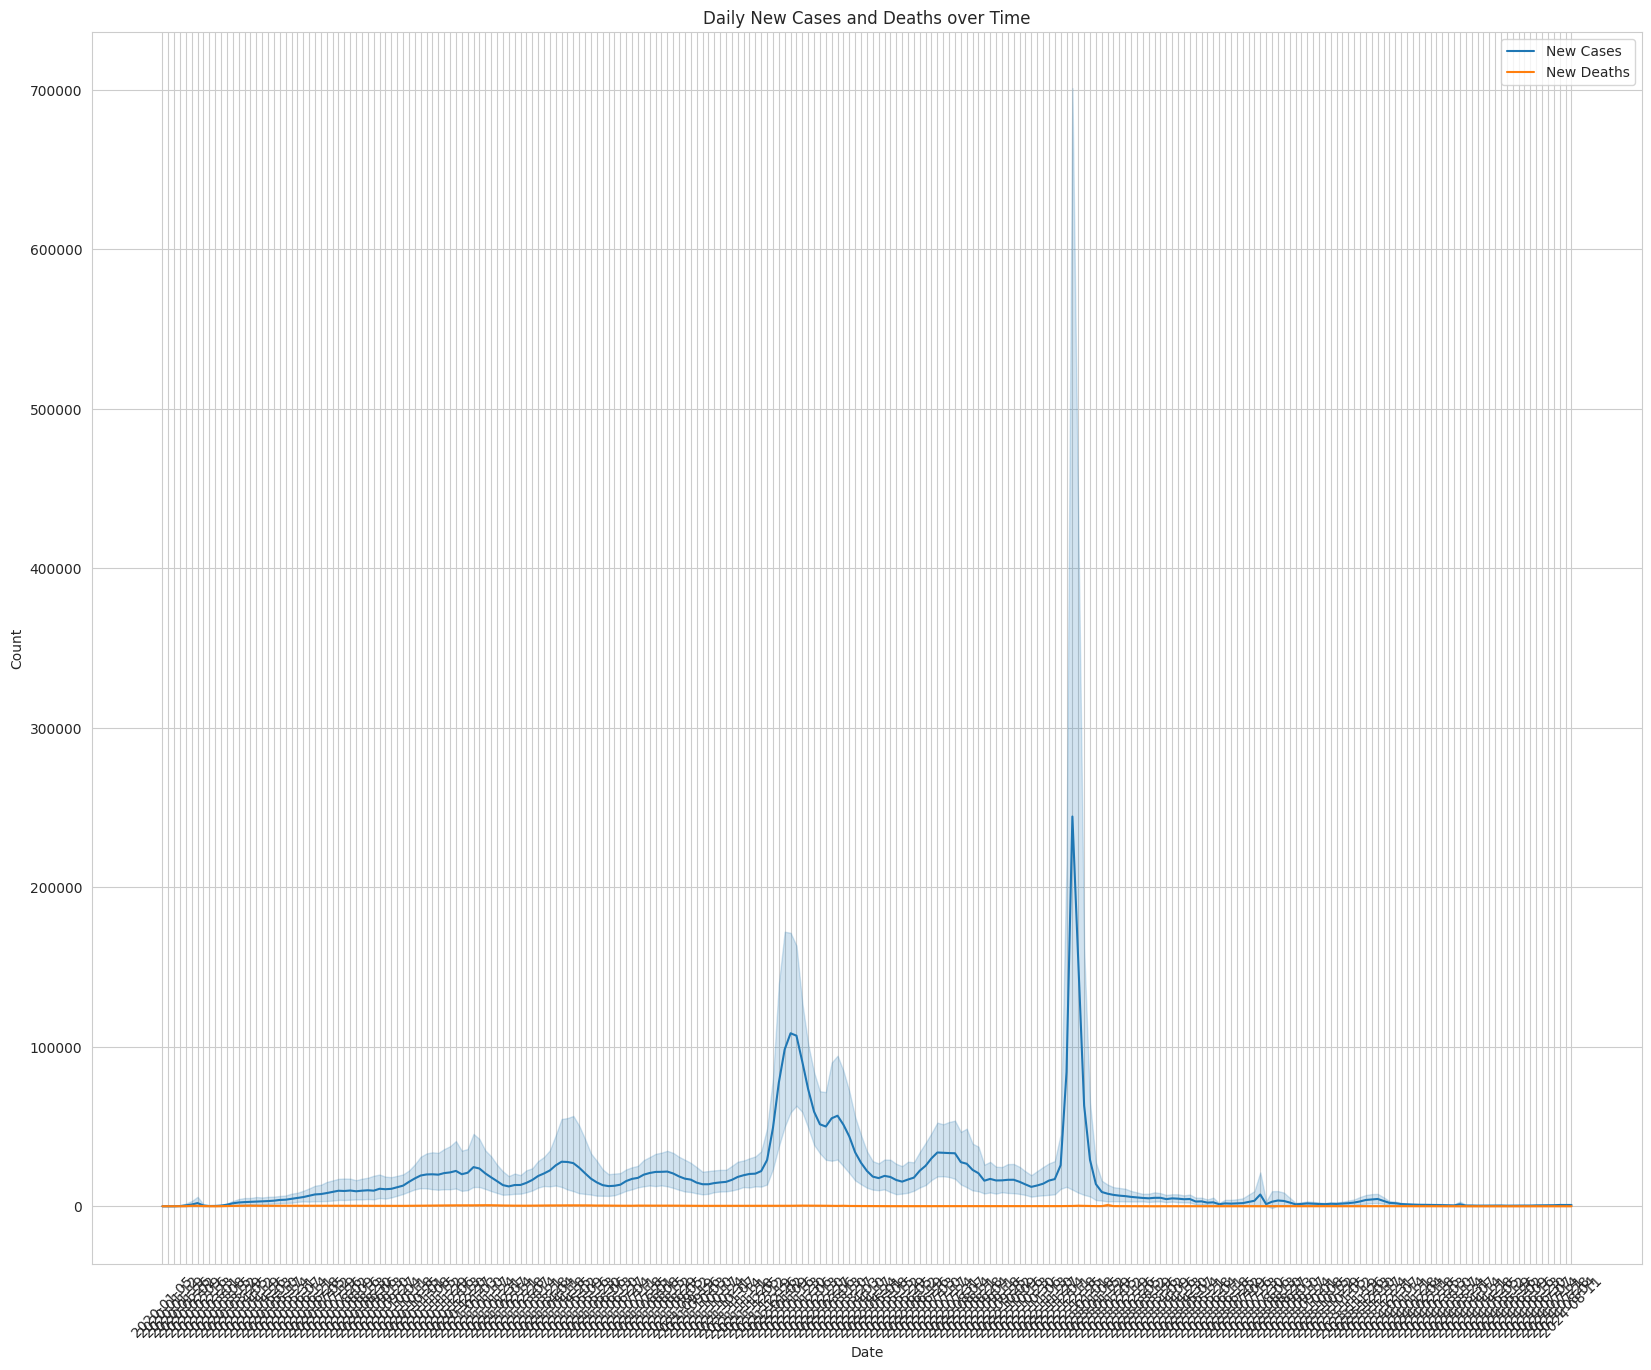

In [60]:
# Time Series Plot for New Cases and New Deaths over Time
plt.figure(figsize=(20, 16))
sns.lineplot(x='Date_reported', y='New_cases', data=data, label='New Cases')
sns.lineplot(x='Date_reported', y='New_deaths', data=data, label='New Deaths')
plt.title('Daily New Cases and Deaths over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#**it not clear so I will group it by month** ⬇

In [61]:
data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data['Month'] = data['Date_reported'].dt.to_period('M').dt.strftime('%Y-%m')

monthly_data = data.groupby('Month').agg({'New_cases': 'sum', 'New_deaths': 'sum'}).reset_index()

fig = px.line(monthly_data, x='Month', y=['New_cases', 'New_deaths'],
              title='Monthly New Cases and Deaths over Time', labels={'value': 'Count', 'variable': 'Metric'})
fig.show()

## why the cases rising?
well based on [this article](https://jamanetwork.com/journals/jama/fullarticle/2793011://); The main reason why COVID-19 cases are rising again is the emergence of new, more transmissible Omicron subvariants like BA.2 and BA.2.12.1, in addition to the waning of immunity from prior infection and vaccination, and the lifting of pandemic restrictions.

In [62]:
data['Date_reported'] = pd.to_datetime(data['Date_reported'])

# Time Series Plot for Cumulative Cases and Cumulative Deaths Over Time
fig = px.line(data, x='Date_reported', y=['Cumulative_cases', 'Cumulative_deaths'],
              title='Cumulative Cases and Cumulative Deaths Over Time', labels={'value': 'Count', 'variable': 'Metric'})
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## tip: to display one metric click om the other in the legend in the fig above. try it it not what it seems at first!

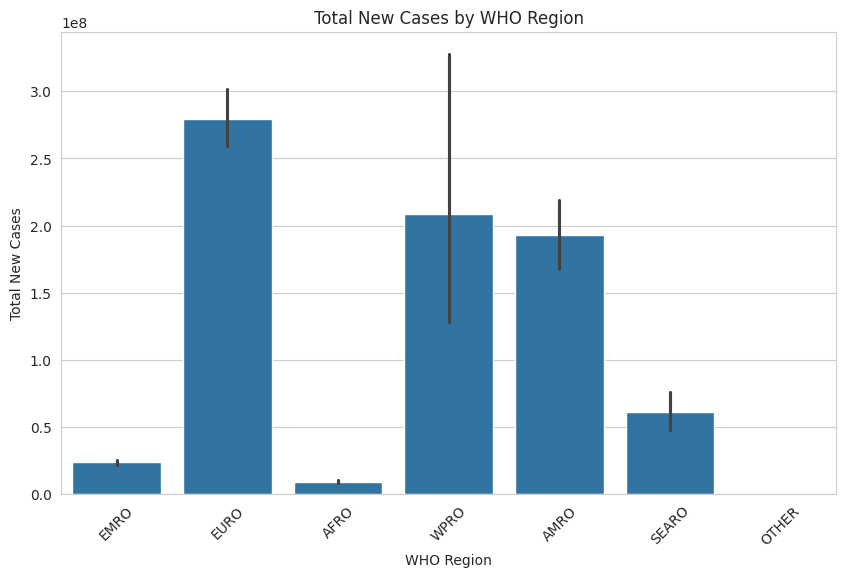

In [63]:
# Bar Plot for Total New Cases by WHO Region
plt.figure(figsize=(10, 6))
sns.barplot(x='WHO_region', y='New_cases', data=data, estimator=sum)
plt.title('Total New Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.show()

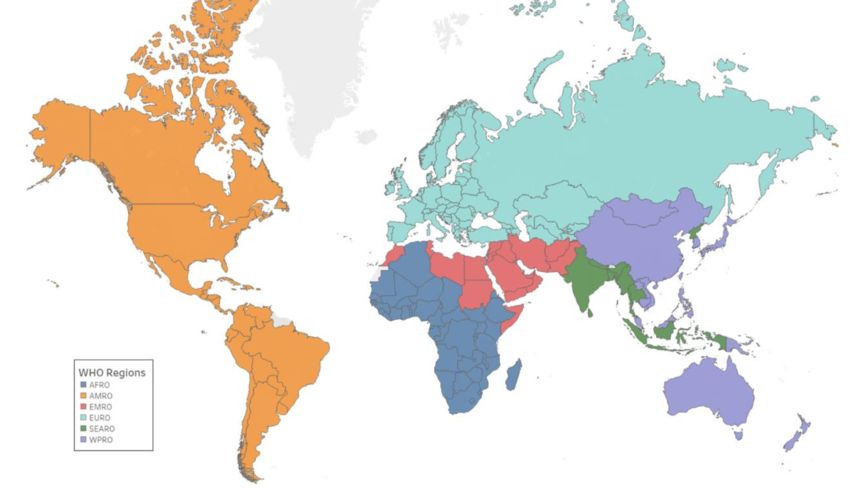

The WHO regions include the African Region (AFRO), the Region of the Americas (AMRO), the Eastern Mediterranean Region (EMRO), the European Region (EURO), the South-East Asia Region (SEARO), and the Western Pacific Region (WPRO).

for more info click:

https://www.researchgate.net/figure/A-global-map-of-the-World-Health-Organization-WHO-regions-The-WHO-regions-include-the_fig1_348798120#:~:text=The%20WHO%20regions%20include%20the,(green)%20%5B33%5D.

In [64]:
# Scatter Plot for New Cases vs. New Deaths
fig = px.scatter(data, x='New_cases', y='New_deaths', color='WHO_region',
                 title='New Cases vs. New Deaths', labels={'New_cases': 'New Cases', 'New_deaths': 'New Deaths'})
fig.show()

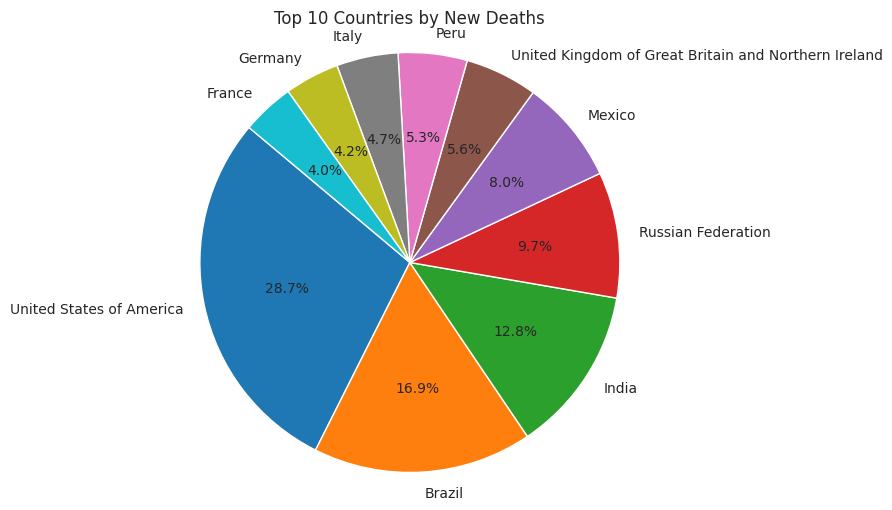

In [65]:
# Pie Chart for Distribution of New Deaths by Country
plt.figure(figsize=(10, 6))
new_deaths_by_country = data.groupby('Country')['New_deaths'].sum().sort_values(ascending=False).head(10)
plt.pie(new_deaths_by_country, labels=new_deaths_by_country.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Countries by New Deaths')
plt.show()

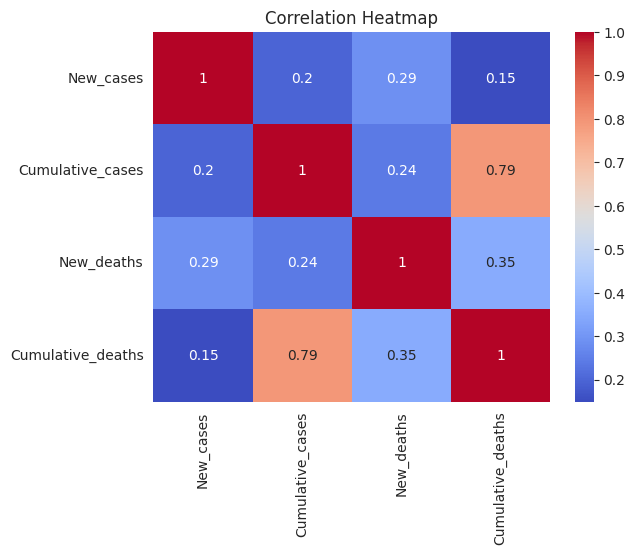

In [66]:
# Heatmap for Correlation between Numerical Columns
sns.heatmap(data[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [67]:
# Group by country and get the cumulative cases
top_countries = data.groupby('Country')['Cumulative_cases'].max().nlargest(10).reset_index()

# Bar Plot for Top Countries by Cumulative Cases
fig = px.bar(top_countries, x='Country', y='Cumulative_cases',
             title='Top 10 Countries by Cumulative Cases', labels={'Cumulative_cases': 'Cumulative Cases'})
fig.show()

### In the "Top 10 Countries by Cumulative Cases" figure above, the United States of America leads with the highest number of cases, followed by China, with a significant drop-off in cases for the remaining countries.

In [68]:
# Group by country and get the cumulative deaths
cumulative_deaths_by_country = data.groupby('Country')['Cumulative_deaths'].max().nlargest(10).reset_index()

# Bar plot for cumulative deaths by country
fig = px.bar(cumulative_deaths_by_country, x='Country', y='Cumulative_deaths',
             title='Top 10 Countries by Cumulative Deaths', labels={'Cumulative_deaths': 'Cumulative Deaths'})
fig.show()

Although both the USA and China have the most cumulative cases, the USA stands out with the highest number of cumulative deaths. Surprisingly, China doesn't even rank in the top 10. There could be several reasons for this exclusion:

1. Reporting Practices: Data accuracy and transparency differ among countries.
2. Healthcare Systems: Discrepancies in access to healthcare and how deaths are reported can impact mortality data.

But based on the information provided in the [News](https://www.cidrap.umn.edu/tangled-web-42-americans-ignored-covid-precautions-or-lied-about-taking-them), it seems that a significant portion of the American public did not fully adhere to COVID-19 public health measures during the pandemic. Here are the key points:

* The survey found that 41.6% of respondents said they misrepresented or did not follow at least one public health measure related to COVID-19.

* Common reasons cited for ignoring guidelines included wanting life to feel normal, exercising personal freedom, thinking COVID-19 was a hoax or not a major issue, and not wanting to miss work or be judged by others.

* Younger individuals (under 60 years old) and those with greater distrust of science were more likely to misrepresent or not adhere to COVID-19 measures.

* The author "Stephanie Soucheray" noted that this lack of adherence can contribute to prolonging the pandemic and lead to greater transmission of the virus in communities.

* While the survey did not find links between COVID-19 untruthfulness and political beliefs, affiliation, or religion, it does suggest that a sizable portion of the American public was unwilling to fully comply with public health guidance during the pandemic.

In summary, the file indicates that a significant minority of Americans did not follow COVID-19 prevention measures, often due to a desire to maintain normalcy and exercise personal freedoms, as well as underlying distrust of science - which contributed to prolonging the pandemic's impact in the United States. This aligns with the premise that parts of the US public ignored or downplayed the seriousness of the COVID-19 crisis.

In [69]:
# Filter out rows with missing WHO region
data = data.dropna(subset=['WHO_region'])

# Create a pie chart for the distribution of new cases by WHO region
fig = px.pie(data, values='New_cases', names='WHO_region', title='Distribution of New Cases by WHO Region')
fig.show()

#### even though Western Pacific Region (WPRO) - which they are Australia, Brunei, Cambodia, China, Cook Islands, Fiji, Japan, Kiribati, Laos, Malaysia, Marshall Islands, Micronesia, Mongolia, Nauru, New Zealand, Niue, Palau, Papua New Guinea, Philippines, Samoa, Singapore, Solomon Islands, South Korea, Taiwan, Tonga, Tuvalu, Vanuatu, Vietnam. or click [here](https://shorturl.at/4C7OI) - are more New Cases then any other region.

#### *note that USA are part from the AMRO Region*

In [70]:
# Filter out rows with missing new cases
data = data.dropna(subset=['New_cases'])

# Line plot for new cases over time by country
fig = px.line(data, x='Date_reported', y='New_cases', color='Country', title='New Cases Over Time by Country')
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result





---



## Most of the visuals indicate that both the USA and China dominate. Let's proceed with comparing COVID-19 cases between countries.

In [71]:
usa_data = data[data['Country'] == 'United States of America']
china_data = data[data['Country'] == 'China']

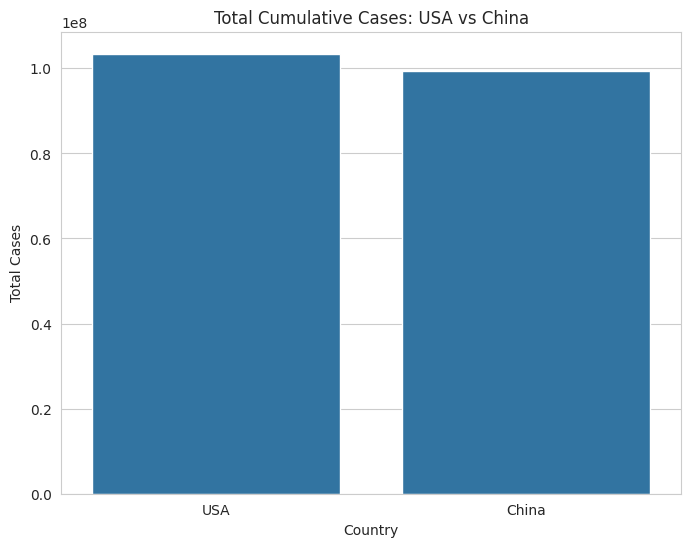

In [72]:
total_cases = pd.DataFrame({
    'Country': ['USA', 'China'],
    'Total Cases': [usa_data['Cumulative_cases'].max(), china_data['Cumulative_cases'].max()]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Country', y='Total Cases', data=total_cases)
plt.title('Total Cumulative Cases: USA vs China')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.show()

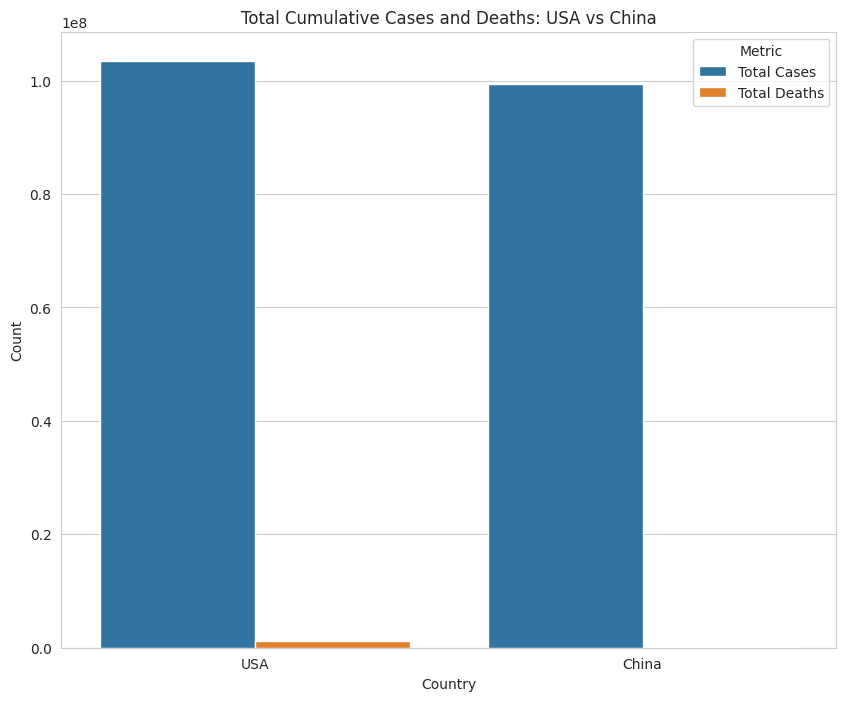

In [73]:
total_data = pd.DataFrame({
    'Country': ['USA', 'China', 'USA', 'China'],
    'Metric': ['Total Cases', 'Total Cases', 'Total Deaths', 'Total Deaths'],
    'Count': [usa_data['Cumulative_cases'].max(), china_data['Cumulative_cases'].max(),
              usa_data['Cumulative_deaths'].max(), china_data['Cumulative_deaths'].max()]
})

plt.figure(figsize=(10, 8))
sns.barplot(x='Country', y='Count', hue='Metric', data=total_data)
plt.title('Total Cumulative Cases and Deaths: USA vs China')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

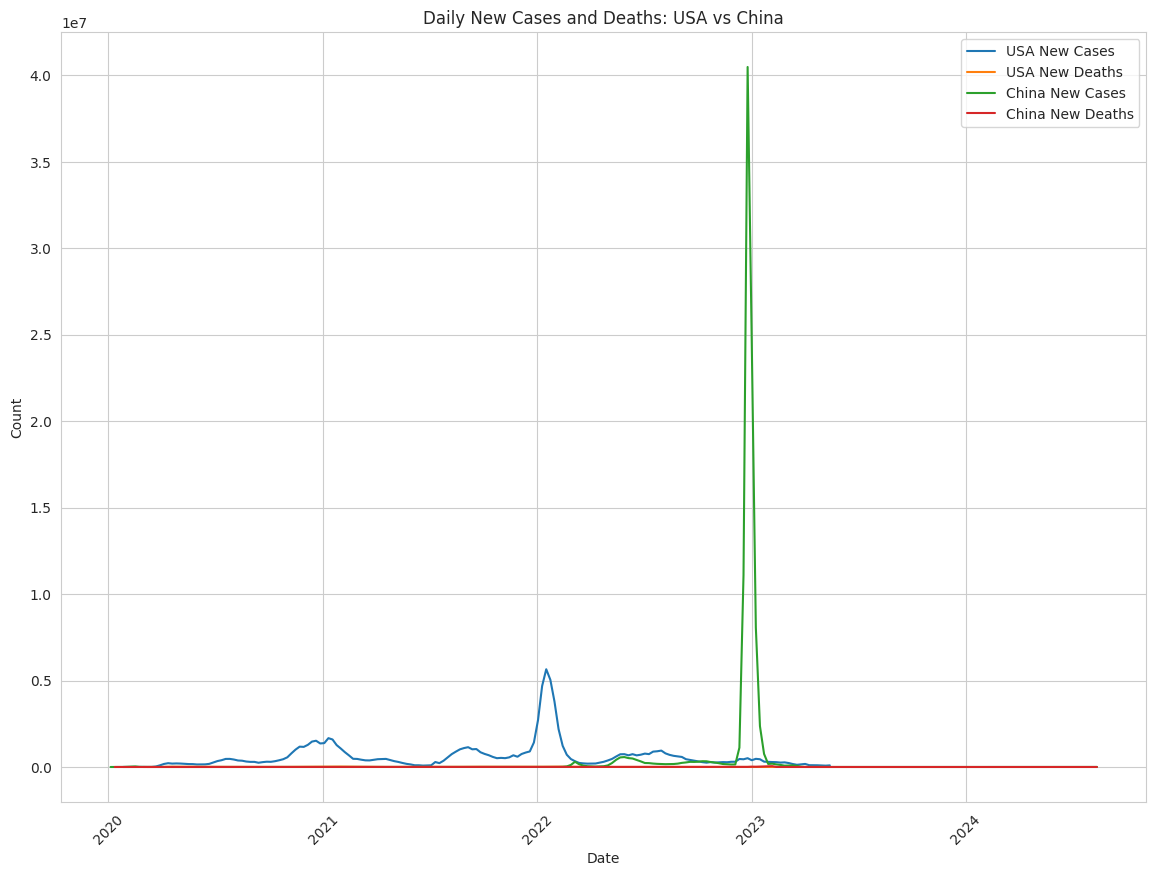

In [74]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='Date_reported', y='New_cases', data=usa_data, label='USA New Cases')
sns.lineplot(x='Date_reported', y='New_deaths', data=usa_data, label='USA New Deaths')
sns.lineplot(x='Date_reported', y='New_cases', data=china_data, label='China New Cases')
sns.lineplot(x='Date_reported', y='New_deaths', data=china_data, label='China New Deaths')
plt.title('Daily New Cases and Deaths: USA vs China')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [75]:
combined_data = pd.concat([usa_data, china_data], keys=['USA', 'China']).reset_index()

melted_data = combined_data.melt(id_vars=['Date_reported', 'level_0'],
                                 value_vars=['New_cases', 'New_deaths'],
                                 var_name='Case_type', value_name='Count')
fig = px.line(melted_data,
              x='Date_reported',
              y='Count',
              color='level_0',
              line_dash='Case_type',  # Differentiate lines by case type
              labels={'level_0': 'Country', 'Date_reported': 'Date', 'Count': 'Number of Cases'},
              title='Daily New Cases and Deaths: USA vs China')

fig.update_layout(title_x=0.5, xaxis_tickangle=-45)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### After comparing both countries' new deaths, China's deaths spike around 2023, maybe because China announced a major relaxation of its zero-COVID policy on December 7, 2022, leading to a surge in SARS-CoV-2 infections. refer to the [study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10521589/).



---



The resurgence of COVID-19 cases can be attributed to various factors, including the emergence of highly transmissible Omicron subvariants like BA.2 and BA.2.12.1, waning immunity from prior infections and vaccinations, and the relaxation of pandemic restrictions.

In the analysis of cumulative cases, the United States leads, followed by China, with a significant drop in cases for other countries. Despite their high case numbers, the USA notably has the highest cumulative deaths, while China is absent from the top 10, possibly due to discrepancies in reporting practices and healthcare systems.

The survey findings suggest that a significant portion of the American public did not fully adhere to COVID-19 preventive measures, often due to a desire for normalcy, personal freedom, or distrust of science. This lack of adherence likely contributed to prolonging the pandemic's impact.

In the Western Pacific Region, countries have reported more new cases than any other region. While the visuals predominantly highlight the dominance of the USA and China, comparing new deaths reveals a spike in China's deaths around 2023, potentially linked to the relaxation of China's zero-COVID policy in late 2022.

In conclusion, the data and analysis underscore the complex interplay of factors influencing COVID-19 trends globally, from new variants and immunity issues to public adherence to health measures. Understanding these dynamics is crucial for effective pandemic response and mitigation efforts moving forward.

please refer to [WHO](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)

### Any suggestions or recommendations, please connect with me on [LinkedIn](https://www.linkedin.com/in/alhanoufaldossary/).😊